# Smile detection from webcam

This collab uses haar cascades to put a bounding box around faces, and then uses a CNN to predict if the face inside the bounding box is smiling or not.

Jackson Wagner
11/1/2022

**Citations:**

how to access webcam: https://colab.research.google.com/drive/1QnC7lV7oVFk5OZCm75fqbLAfD9qBy9bw?usp=sharing#scrollTo=1nkSnkbkk4cC 

pyimagesearch university for dataset and code pointers

CS289A course material



**Download the dataset with smiling / not smiling images**



In [ ]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/smile-detection/smile-detection.zip
!unzip -qq smile-detection.zip
%cd smile-detection

--2022-11-16 03:29:02--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/smile-detection/smile-detection.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.92.179.34, 52.218.243.65, 3.5.87.130, ...
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.92.179.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53276632 (51M) [binary/octet-stream]
Saving to: ‘smile-detection.zip’

smile-detection.zip 100%[===================>]  50.81M  30.6MB/s    in 1.7s    

2022-11-16 03:29:04 (30.6 MB/s) - ‘smile-detection.zip’ saved [53276632/53276632]

/content/smile-detection


**imports**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from imutils import paths
import imutils
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

import tensorflow as tf

from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time


**set up the dataset and split into test / train sets**

In [ ]:
data = []
labels = []
for imagePath in sorted(list(paths.list_images("dataset/SMILEsmileD"))):
  # load the image, pre-process it, and store it in the data list
  image = cv2.imread(imagePath)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image = imutils.resize(image, width=28)
  image = img_to_array(image)
  data.append(image)

  # extract the class label from the image path and update the
  # labels list
  label = imagePath.split(os.path.sep)[-3]
  label = 1 if label == "positives" else 0
  labels.append(label)


In [ ]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [ ]:
num_smiling = sum(labels)
num_not_smiling = len(labels) - sum(labels)
print(num_smiling)
print(num_not_smiling)

3690
9475


In [ ]:
data2 = data.reshape(13165, 28, 28)

label =  0


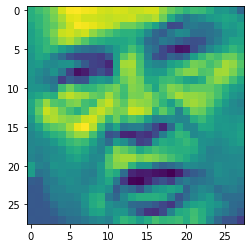

In [ ]:
plt.imshow(data2[0])
print('label = ', labels[0])

In [ ]:
(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

**build the neural network and set up the haar cascade classifier**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(16, (4,4), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(.2),

    # tf.keras.layers.Conv2D(16, (4,4), activation='relu', input_shape=(28, 28, 1)),
    # tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.Dropout(.2),

    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs=7)

Epoch 1/7
330/330 [==============================] - 9s 23ms/step - loss: 0.3503 - accuracy: 0.8611
Epoch 2/7
330/330 [==============================] - 7s 22ms/step - loss: 0.2441 - accuracy: 0.9042
Epoch 3/7
330/330 [==============================] - 7s 22ms/step - loss: 0.1981 - accuracy: 0.9210
Epoch 4/7
330/330 [==============================] - 8s 25ms/step - loss: 0.1651 - accuracy: 0.9364
Epoch 5/7
330/330 [==============================] - 8s 24ms/step - loss: 0.1353 - accuracy: 0.9494
Epoch 6/7
330/330 [==============================] - 8s 23ms/step - loss: 0.1073 - accuracy: 0.9624
Epoch 7/7
330/330 [==============================] - 7s 23ms/step - loss: 0.0907 - accuracy: 0.9673


In [ ]:
model.evaluate(X_test, Y_test)

83/83 [==============================] - 1s 5ms/step - loss: 0.3339 - accuracy: 0.9096


[0.3338735103607178, 0.9096088409423828]

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_9 (Batc  (None, 28, 28, 1)        4         
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 batch_normalization_10 (Bat  (None, 26, 26, 16)       64        
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 16)        0         
                                                      

83/83 [==============================] - 1s 11ms/step
[5.4686925e-06]
label =  0


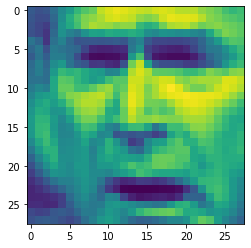

In [ ]:
classifications = model.predict(X_test)

k = 40
print(classifications[k])
print('label = ', Y_test[k])

plt.imshow(X_test[k].reshape(28,28))

**set up the haar cascade classifier**

In [ ]:
#set up the haar cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

**these next few cells are copy pasted from this notebook to pull from the webcam**
https://colab.research.google.com/drive/1QnC7lV7oVFk5OZCm75fqbLAfD9qBy9bw?usp=sharing#scrollTo=1nkSnkbkk4cC 

In [ ]:
## code to help with camera

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

**here we run our model on processed frames from the webcam, and print if our model thinks we are smiling or not!**

In [ ]:
face_examples = []

In [ ]:
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)

    for (x,y,w,h) in faces:
      # bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)
      roi = gray[y:y + h, x:x+w]
      roi = cv2.resize(roi, (28, 28))
      roi = roi.astype("float") / 255.0
      roi = img_to_array(roi)
      roi = np.expand_dims(roi, axis=0)

      smiling = model.predict(roi)[0]
      # print(smiling)
      # if smiling[0] > smiling[1]:
      #   print('SMILING!')
      # else:
      #   print('NOT SMILING')

      if smiling > 0.2:
        print('Smiling! = ', smiling)
        y_hat = 1
      else:
        print('not smiling, = ', smiling)
      
      face_examples.append([roi, smiling])




<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 19ms/step
not smiling, =  [8.13994e-11]
1/1 [==============================] - 0s 19ms/step
not smiling, =  [4.1283704e-07]
1/1 [==============================] - 0s 18ms/step
not smiling, =  [5.0279624e-08]
1/1 [==============================] - 0s 23ms/step
Smiling! =  [0.22131717]
1/1 [==============================] - 0s 21ms/step
not smiling, =  [0.11300812]
1/1 [==============================] - 0s 17ms/step
not smiling, =  [3.4416719e-06]
1/1 [==============================] - 0s 16ms/step
not smiling, =  [3.1093403e-08]
1/1 [==============================] - 0s 15ms/step
Smiling! =  [0.9827787]
1/1 [==============================] - 0s 16ms/step
not smiling, =  [0.04923549]
1/1 [==============================] - 0s 17ms/step
not smiling, =  [0.01835854]
1/1 [==============================] - 0s 16ms/step
not smiling, =  [0.02064833]
1/1 [==============================] - 0s 16ms/step
Smiling! =  [0.7274518]
1/1 [========================

KeyboardInterrupt: ignored

In [ ]:
# print(face_examples[0])
# for i in range(10):
#   face = face_examples[i][0]
#   # value = face_examples[i][i]
#   plt.imshow(face.reshape(28,28))
#   plt.show()
len(face_examples)

86